In [1]:
import numpy as np
import healpy as hp
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from sources import DMsignal
from sources import smoothDM

integrated flux =  1.7249124107188893


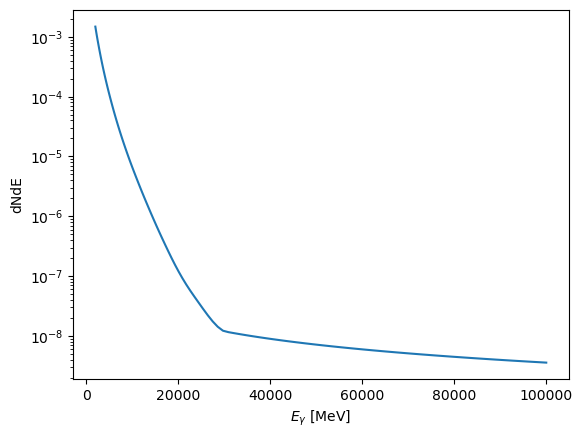

In [22]:
energy_range = [2000, 100000] #MeV
angular_cut = 10*u.deg.to('rad') #degrees
N_side_DM = 2**8
N_Ebins_DM = 100
settings = {'N_side': N_side_DM, 'theta_cutoff': angular_cut, 'halo_dist': 8.5*u.kpc.to('cm'), 'Rs': 20*u.kpc.to('cm'), 'mass_func': 'gNFW'}
my_DM_flux = smoothDM.smoothDM(**settings)
channel = 'b'
DM_directory = '../../data/dm_spectra/'
my_DM_signal = DMsignal.DMsignal(DM_directory, channel)


DM_mass = 30000
cross_sec = 3*1e-26 #cm^3 s^-1
rho_s = 1.06e-2*u.Msun.to('kg')*c.c.value**2*u.J.to('MeV')/u.pc.to('cm')**3
r_s = 20*u.kpc.to('cm')
gamma = 1.2
DM_energies = np.geomspace(energy_range[0], energy_range[1], N_Ebins_DM+1) #MeV
dNdE = my_DM_signal.get_dNdE(DM_energies, channel, DM_mass)
mass_func_params = (r_s, rho_s, gamma)
DM_map, DM_indices = my_DM_flux.get_map(DM_mass, cross_sec, dNdE, mass_func_params)

fig, ax = plt.subplots()
ax.plot(DM_energies, dNdE)
ax.set_yscale('log')
ax.set_xlabel(r'$E_\gamma$ [MeV]')
ax.set_ylabel('dNdE')
print('integrated flux = ', np.sum(dNdE[:-1]*(DM_energies[1:]-DM_energies[:-1])))

In [2]:
settings = {'N_side': 2**10, 'theta_cutoff': 5*np.pi/180, 'halo_dist': 8.5, 'Rs': 20, 'mass_func': 'gNFW'}
my_DM_flux = smoothDM.smoothDM(**settings)
#exposure = 10*u.cm.to('kpc')**2*u.yr.to('s') #cm^2yr --> kpc^2/s
DM_mass = 100*1000 #MeV
cross_sec = 3e-26*u.cm.to('kpc')**3 #cm^3/s --> kpc^3/s
channel = 'b'
DM_directory = '../../data/dm_spectra/'
my_DM_signal = DMsignal.DMsignal(DM_directory, channel)
energy = np.linspace(1, 10000, 1000) #MeV
dNdE = my_DM_signal.get_dNdE(energy, channel, DM_mass)
rho_s = 1.06e-2*u.Msun.to('kg')*c.c.value**2*u.J.to('MeV')/u.pc.to('kpc')**2
r_s = 12.5 #kpc
gamma = 1
mass_func_params = (rho_s, r_s, gamma) #from 1110.4431

DM_map, pix = my_DM_flux.get_map(DM_mass, cross_sec, dNdE, energy, mass_func_params)
view_map = np.zeros(12*settings['N_side']**2)
view_map[pix] = np.sum(DM_map, axis = 1)
hp.zoomtool.mollzoom(np.log(view_map))
print('Number of pixels: ', np.size(pix))

TypeError: smoothDM.get_map() takes 5 positional arguments but 6 were given